# Stochastischer Prozess

## Übungsblatt

In [1]:
import numpy as np
import matplotlib.pyplot as plt
from collections import Counter


### Aufgabe 1: Computerspiel

Bei einem Computerspiel gibt es drei Zustände: Level 1, Level 2 und Level 3. Eine Spielerin beginnt auf Level 1 und bewältigt die Übergänge von Level 1 nach Level 2 mit einer Wahrscheinlichkeit von 80 % und von 2 nach 3 mit einer Wahrscheinlichkeit von 60 %. Ein Level zurückfallen ist nicht möglich. Sie spielt so lange, bis sie Level 3 erreicht hat.

Der Ablauf (von Level zu Level) ist eine Markow-Kette. Sie kann durch ein "unendliches" Baumdiagramm oder ein Prozessdiagramm mit drei Zuständen beschrieben werden:

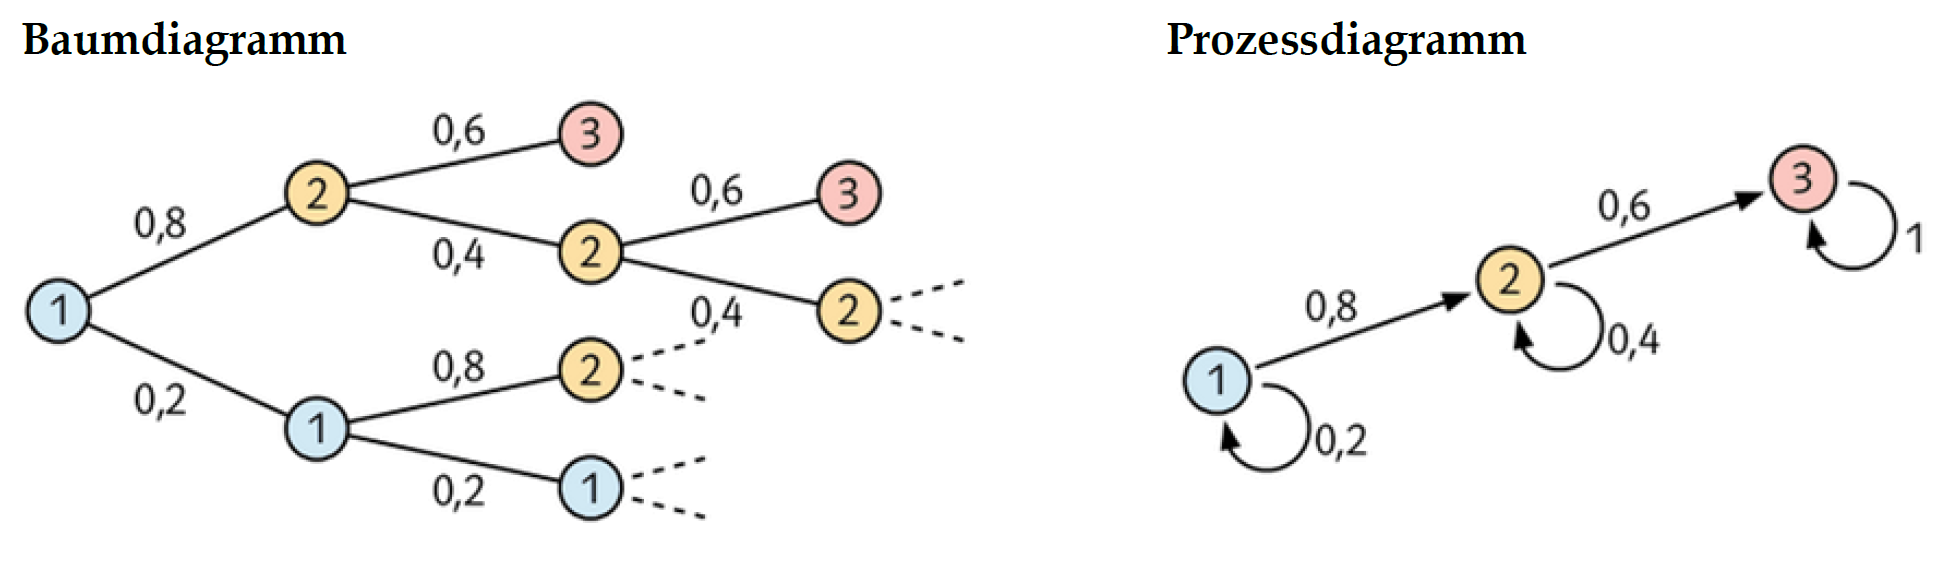

Das Beispiel wurde adaptiert aus: [Modellieren und Rechnen mit Matrizen - Jörn Meyer](https://www.maspole.de/index.php/mathematikunterricht/jahrgang-13-g9-q2-phase/modellieren-mit-matrizen/download/88-modellieren-und-rechnen-mit-matrizensse/1037-13-modellieren-und-rechnen-mit-matrizen-skript).

Schreibe eine Funktion `play_game(rng: np.random.Generator)`, die den Spielverlauf simuliert und die Anzahl der benötigten Versuche zurückgibt, bis die Spielerin das Level 3 erreicht. Der Parameter `rng` ist dabei ein NumPy Random Generator.

In [2]:
p_12 = 0.8
p_23 = 0.6


def play_game(rng: np.random.Generator) -> int:
    level = 1
    attempts = 0

    while level < 3:
        attempts += 1
        if level == 1:
            if rng.random() < p_12:
                level += 1
        elif level == 2:
            if rng.random() < p_23:
                level += 1

    return attempts


In [3]:
rng = np.random.default_rng(12345678)
print(f"Die Spielerin erreichte Level 3 nach {play_game(rng)} Versuchen.")


Die Spielerin erreichte Level 3 nach 4 Versuchen.


Alternative Implementation mit der Übergangsmatrix (engl. transition matrix):

In [4]:
levels = (1, 2, 3)
transition_matrix = (
    None,
    (1 - p_12, p_12, 0),
    (0, 1 - p_23, p_23),
    (0, 0, 1),
)


def play_game2(rng: np.random.Generator) -> int:
    level = 1
    attempts = 0
    while level < 3:
        attempts += 1
        level = rng.choice(levels, p=transition_matrix[level])
    return attempts


rng = np.random.default_rng(12345678)
print(f"Die Spielerin erreichte Level 3 nach {play_game2(rng)} Versuchen.")


Die Spielerin erreichte Level 3 nach 2 Versuchen.


#### b) Mittlere Spieldauer mit Monte-Carlo-Simulation schätzen

Simuliere das Spiel `play_game()` nun 1000 Mal (Monte-Carlo-Simulation) und sammle die benötigten Versuche in einem Array.

Berechne den Mittelwert und die Standardabweichung der benötigten Versuche.

In [5]:
n = 1000
rng = np.random.default_rng(29834)
attemps = np.array([play_game(rng) for _ in range(n)])
attemps.mean(), attemps.std()


(2.907, 1.231402046449493)

#### c) Relative Häufigkeiten der Anzahl Versuche

Bereche die relative Häufigkeit, dass die Spielerin nach $n$ Versuchen Level 3 erreicht hat und stelle sie mit einem Bar-Plot dar. Verwende dazu die Resultate der 1000 Simulationen aus Teil b). Was fällt dir auf?

Hierfür kannst du [`np.bincount`](https://numpy.org/doc/stable/reference/generated/numpy.bincount.html) oder [`Counter`](https://docs.python.org/3/library/collections.html#collections.Counter) verwenden.

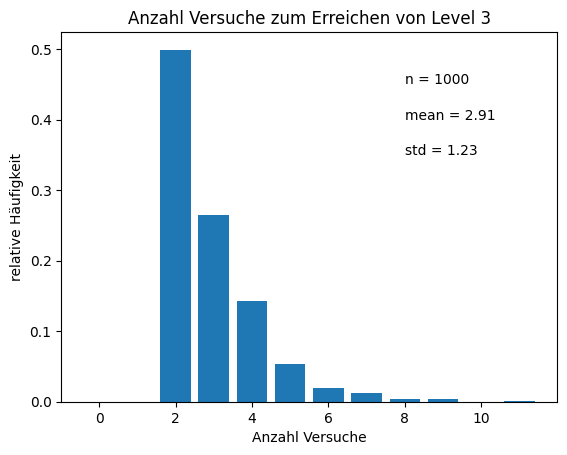

In [6]:
# Absolute Häufigkeiten der Versuche
counts = np.bincount(attemps)

# Relative Häufigkeiten der Versuche
frequencies = counts / len(attemps)

# Erstelle Barplot
plt.bar(np.arange(len(counts)), frequencies)
plt.xlabel("Anzahl Versuche")
plt.ylabel("relative Häufigkeit")
plt.title("Anzahl Versuche zum Erreichen von Level 3")
plt.text(8, 0.45, f"n = {len(attemps)}")
plt.text(8, 0.4, f"mean = {attemps.mean():.2f}")
plt.text(8, 0.35, f"std = {attemps.std():.2f}")
plt.show()


### Aufgabe 2: Random Walk in 1D


Der Random Walk (dt. "zufälliger Spaziergang") ist ein Konzept aus der Stochastik, das in vielen Bereichen der Physik, Mathematik und Informatik Anwendung findet. Er beschreibt eine mathematische Idee, bei der ein Teilchen auf einem Gitter oder in einem Raum eine zufällige Bewegung ausführt.

Ein Random Walk kann auf verschiedene Weise durchgeführt werden, aber im Allgemeinen besteht er aus einer Abfolge von Schritten, die zufällig in verschiedene Richtungen durchgeführt werden. Jeder Schritt kann eine feste Länge haben oder eine zufällige Länge zwischen einem bestimmten Minimum und Maximum.

Random Walks sind in vielen Bereichen nützlich, da sie helfen, das Verhalten von Partikeln oder Molekülen in einer Flüssigkeit oder Gas zu modellieren, das Wachstum von Zellen in einem Gewebe zu simulieren oder das Verhalten von Tieren bei der Futtersuche zu untersuchen. Sie können auch in der Finanzmathematik verwendet werden, um den Preis von Wertpapieren oder Optionen zu modellieren.

Ein wichtiger Aspekt des Random Walks ist die Wahrscheinlichkeitsverteilung der Schritte, die das Teilchen durchführt. Wenn die Schritte zufällig sind und die Wahrscheinlichkeitsverteilung der Schrittlängen symmetrisch ist, d.h. sie hat das gleiche Gewicht für positive und negative Werte, dann wird der Random Walk als "einfacher Random Walk" bezeichnet.

Eine weitere wichtige Eigenschaft von Random Walks ist die Tatsache, dass sie dazu neigen, sich auszubreiten oder zu diffundieren. Das bedeutet, dass sich das Teilchen im Durchschnitt mit der Wurzel aus der Anzahl der durchgeführten Schritte von seinem ursprünglichen Ausgangspunkt entfernt. Dies ist ein grundlegendes Prinzip der Diffusionsphysik und wird in vielen Anwendungen wie der Molekularbiologie, der Physik von Flüssigkeiten und Gasen sowie der Finanzmathematik verwendet.

Insgesamt ist der Random Walk ein wichtiges Konzept der Stochastik und findet in vielen Bereichen Anwendung. Es hilft uns, das Verhalten von Partikeln, Molekülen oder Tieren zu modellieren und zu verstehen, wie sich diese Systeme über die Zeit entwickeln.

Wikipedia Artikel:
- ["Random Walk" - Wikipedia](https://de.wikipedia.org/wiki/Random_Walk)

Vidoes:
- ["What is a Random Walk? | Infinite Series" - PBS Infinite Series](https://www.youtube.com/watch?v=stgYW6M5o4k&t=177s)
- ["Random walks in 2D and 3D are fundamentally different (Markov chains approach)" - Mathemaniac](https://www.youtube.com/watch?v=iH2kATv49rc&t=141s)

#### a) Random Walk simulieren

Schreibe eine Funktion `random_walk_1d(rng, steps)`, die einen Random Walk in 1D simuliert. Die Funktion soll einen Random Generator `rng` und die Anzahl Schritte `steps` als Argumente entgegennehmen und die abgelaufenen Positionen $x_i$ in einer Liste zurückgeben.

- Startposition: $x_0 = 0$.
- Iterationsvorschrift: $x_{n+1} = x_n + d_{n+1}$.
- Der Schritt $d_{n+1}$ wird zufällig aus der Menge $\{-1, 1\}$ gewählt. Das heisst, die Schrittlänge ist immer 1, die Richtung ist zufällig.

Verwende dazu die Funktion [`rng.choice`](https://numpy.org/doc/stable/reference/random/generated/numpy.random.Generator.choice.html).

In [7]:
def random_walk_1d(rng: np.random.Generator, steps: int):
    possible_steps = (-1, 1)
    position = 0
    walk = [position]
    for _ in range(steps):
        position += rng.choice(possible_steps)
        walk.append(position)
    return np.array(walk)


#### b) Darstellung des Random Walks

Simuliere einen `random_walk_1d()` mit 1000 Schritten und stelle den Verlauf dar.

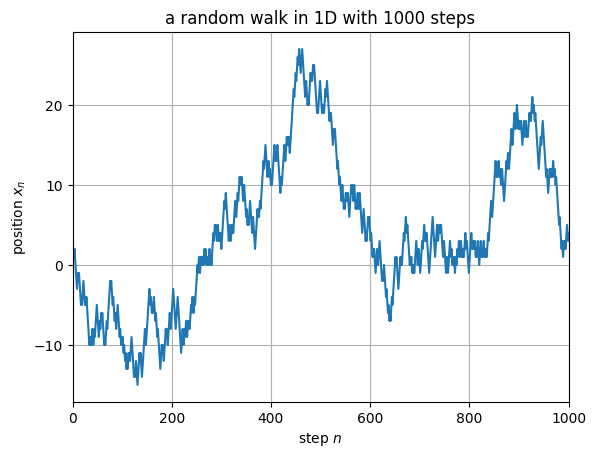

In [8]:
rng = np.random.default_rng(12345678)
steps = 1000
walk = random_walk_1d(rng, steps)

plt.plot(walk)
plt.xlabel("step $n$")
plt.ylabel("position $x_n$")
plt.xlim(0, steps)
plt.title(f"a random walk in 1D with {steps} steps")
plt.grid()
plt.show()


#### c) Darstellen mehrerer Random Walks


Stelle 5 Random Walks mit je 1000 Schritten und unterschiedlichen Seeds in einem Plot dar. Verwende dazu die Funktion `random_walk_1d()` aus Aufgabe b).

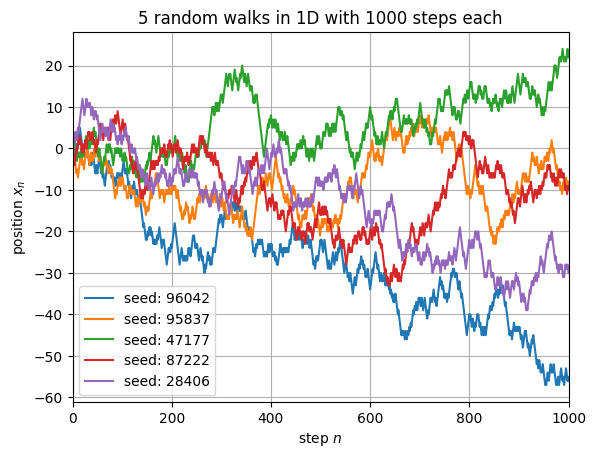

In [9]:
steps = 1000
num_walks = 5

seeds = np.random.default_rng(12345678).integers(100, 100000, num_walks)

for seed in seeds:
    rng = np.random.default_rng(seed)
    walk = random_walk_1d(rng, steps)
    plt.plot(walk, label=f"seed: {seed}")
plt.xlabel("step $n$")
plt.ylabel("position $x_n$")
plt.xlim(0, steps)
plt.title(f"{num_walks} random walks in 1D with {steps} steps each")
plt.grid()
plt.legend()
plt.show()


#### d) Varianz des Random Walks


Wie man in Aufgabe c) sehen kann, driften die Random Walks in 1D mit der Zeit (Anzahl Schritte) auseinander. [Man kann zeigen](https://de.wikipedia.org/wiki/Random_Walk#Eindimensionaler_Fall), dass die Varianz der Aufenthaltsverteilung der Walks mit der Anzahl Schritte linear ansteigt:

$$ \text{Var}(X_n) = n $$

Also ist die Standardabweichung nach $n$ Schritten:

$$ \sigma_n = \sqrt{\text{Var}(X_n)} = \sqrt{n} $$

Das Ziel ist nun, dieses theoretische Resultat mit einer Monte-Carlo-Simulation zu verifizieren.

- Erzeuge 500 Random Walks mit je 1000 Schritten mithilfe von `random_walk_1d()`.
- Packe die resultierenden 500 Walks in ein Array zu einem 2D Array mit Shape (500, 1001). Das heisst jede Zeile ist ein Walk und die $i$-te Spalte entspricht den Positionen der Walks nach $i$ Schritten.
- Berechne die Standardabweichung mit [`np.std`](https://numpy.org/doc/stable/reference/generated/numpy.std.html) pro Spalte, also jeweils über alle Zeilen, das heisst `axis=0`.
- Stelle die Standardabweichung als Funktion des Schritts dar und vergleiche 

In [10]:
steps = 1000
num_walks = 500

sigma_n = np.sqrt(np.arange(steps))

seeds = np.random.default_rng(20934785).integers(100, 100000, num_walks)
rngs = map(np.random.default_rng, seeds)
walks = np.array([random_walk_1d(rng, steps) for rng in rngs])
walks.shape


(500, 1001)

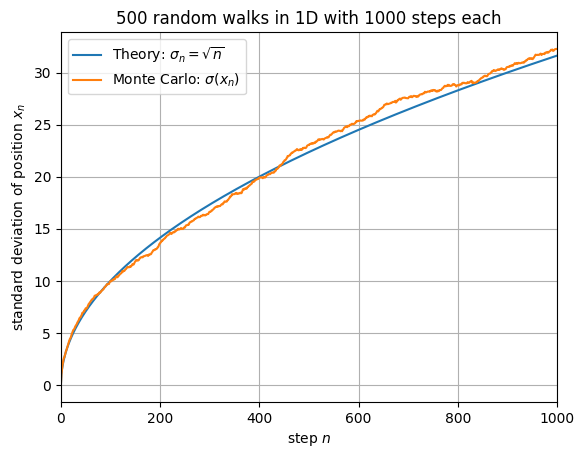

In [11]:
sigma_walks = np.std(walks, axis=0)

plt.plot(sigma_n, label=r"Theory: $\sigma_n = \sqrt{n}$")
plt.plot(sigma_walks, label=r"Monte Carlo: $\sigma(x_n)$")
plt.xlabel("step $n$")
plt.ylabel("standard deviation of position $x_n$")
plt.xlim(0, steps)
plt.title(f"{num_walks} random walks in 1D with {steps} steps each")
plt.grid()
plt.legend()
plt.show()


### Aufgabe 3: Random Walk in 2D


#### a) Random Walk 2D Funktion

Schreibe eine Funktion `random_walk_2d(rng, steps)`, die einen Random Walk in 2D durchführt. Die Funktion soll einen Random Generator `rng` und die Anzahl Schritte `steps` als Argumente entgegennehmen und eine Liste der $x$ und $y$ Positionen zurückgeben.

- Startposition $(x_0, y_0) = (0, 0)$.
- Es sind nur Schritte der Länge 1 erlaubt, entweder in positive oder negative $x$- oder in positive oder negative $y$-Richtung.
- Die Richtung soll zufällig gewählt werden. Verwende dazu die Funktion `rng.choice`.

In [12]:
def random_walk_2d(rng, steps):
    possible_steps = ((1, 0), (-1, 0), (0, 1), (0, -1))
    x, y = 0, 0
    walk_x, walk_y = [x], [y]

    for _ in range(steps):
        dx, dy = rng.choice(possible_steps)
        x += dx
        y += dy
        walk_x.append(x)
        walk_y.append(y)

    return walk_x, walk_y


#### b) Darstellen des Random Walks in 2D


Stelle den `random_walk_2d(rng, steps)` aus Aufgabe a) mit $1000$ Schritten für den Seed $42$  dar.

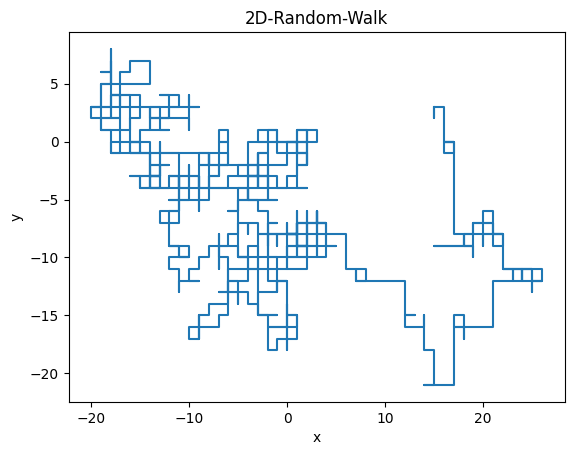

In [13]:
steps = 1000
rng = np.random.default_rng(42)
walk_x, walk_y = random_walk_2d(rng, steps)

plt.plot(walk_x, walk_y)
plt.xlabel("x")
plt.ylabel("y")
plt.title("2D-Random-Walk")
plt.show()


#### c) Rückkehrzeit des Random Walks in 2D

> "A drunk man will find his way home, but a drunk bird may get lost forever." - Shizuo Kakutani

Das nächste Ziel ist es herauszufinden, nach wie vielen Schritten der 2D Random Walk wieder zum Ausgangspunkt zurückkehrt. Dies nennt man die **Rückkehrzeit** (engl. first return time)

Schreibe dazu eine Funktion `first_return_time(rng, max_steps)`, die einen Random Walk in 2D durchführt bis er wieder am Ausgangspunkt angekommen ist. `max_steps` soll hierbei als Abbruchkriterium für die maximale Anzahl Schritte dienen. Die Funktion soll die Anzahl Schritte bis zur ersten Rückkehr zum Ursprung zurückgeben. Ansonsten gelten die gleichen Regeln wie in Aufgabe a).

- ["Drunkard's Walk" - Wikipedia](https://de.wikipedia.org/wiki/Drunkard%E2%80%99s_Walk)
- ["Random walks in 2D and 3D are fundamentally different (Markov chains approach)" - Mathemaniac](https://www.youtube.com/watch?v=iH2kATv49rc&t=141s)

In [14]:
def first_return_time(rng, max_steps):
    possible_steps = ((1, 0), (-1, 0), (0, 1), (0, -1))
    x, y = 0, 0
    steps = 0

    while steps < max_steps:
        dx, dy = rng.choice(possible_steps)
        x += dx
        y += dy
        steps += 1

        if (x, y) == (0, 0):
            break

    return steps


#### d) Darstellen der Verteilung der Rückkehrzeit

Ähnlich wie in Aufgabe 2d) sollen nun viele Simulationen berechnet und jeweils die erste Rückkehrzeit bestimmt werden. Also wieder eine Monte-Carlo-Simulation.

- Erzeuge 500 Seeds und bestimme dafür jeweils die erste Rückkehrzeit mit `first_return_time()`.
- Stelle die Verteilung der ersten Rückkehrzeit als Histogramm mit relativen Häufigkeiten dar.
- Schreibe die Anzahl Simulationen und Mittelwert und Standardabweichung der Rückkehrzeit in den Titel des Diagramms.

Erhöhe die maximale Anzahl Schritte `max_steps` und beobachte, wie sich die Verteilung verändert.

In [15]:
max_steps = 1000
num_walks = 500

seeds = np.random.default_rng(1234567).integers(100, 100000, num_walks)
rngs = map(np.random.default_rng, seeds)
return_times = np.array([first_return_time(rng, max_steps) for rng in rngs])


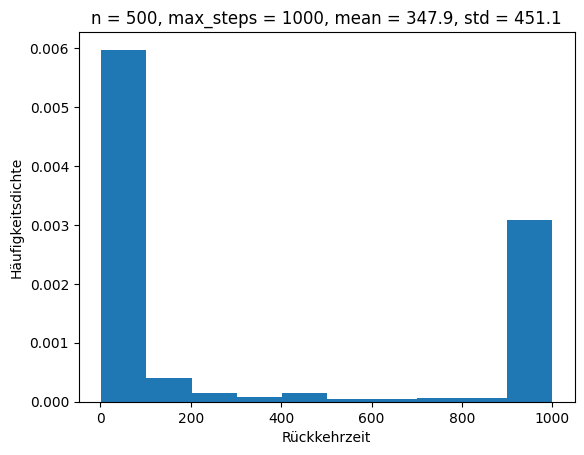

In [16]:
# Histogramm mit Häufigkeitsdichte
# Die Fläche jeder Säule entspricht der relativen Häufigkeit innerhalb des Bins.

plt.hist(return_times, density=True)
# plt.yscale("log")
plt.xlabel("Rückkehrzeit")
plt.ylabel("Häufigkeitsdichte")
plt.title(
    f"n = {num_walks}, max_steps = {max_steps}, mean = {return_times.mean():.1f}, std = {return_times.std():.1f}"
)
plt.show()


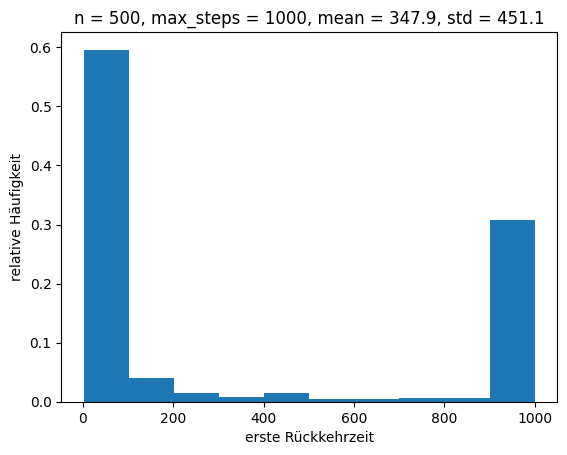

In [17]:
# Histogramm mit relativer Häufigkeit
# Die Höhe jeder Säule entspricht der relativen Häufigkeit innerhalb des Bins.

weights = np.ones_like(return_times) / len(return_times)

plt.hist(return_times, weights=weights)
# plt.yscale("log")
plt.xlabel("erste Rückkehrzeit")
plt.ylabel("relative Häufigkeit")
plt.title(
    f"n = {num_walks}, max_steps = {max_steps}, mean = {return_times.mean():.1f}, std = {return_times.std():.1f}"
)
plt.show()
